# Project 2: Predicting Ontime Performance for Mystery Airline

#### Dennis Murray and Alex Deshowitz
#### MSDS ...


## Data Dictionary

#### Overview
This dataset contains one month of flight(leg) level information for an airline.  This dataset was created with the intent to forecast ontime performance for an airline.  Ontime performance as defined by the US department of transportation as any flight arriving within 15 minutes of its scheduled arrival time in the destination city

* **Origin** - The DOT airport code denoting the starting point of a flight leg (see link for list of codes:####)
* **Destination** - The DOT airport code denoting the ending point of a flight leg.  This list contains the same values as the origin field as an origin can be a destination and a destination can be an origin.  All airlines serve markets in this fashion.  For example, if Delta Airlines serves ATL-MSY (Dallas-New Orleans), they also serve the market in the opposite direction: MSY-ATL. 
* **Market** - A market is any origin and destination pair.  For example: ATL-TPA is a market.  Airlines always serve markets in a balanced fashion.  This means that if the airline serves ATL-MSY 11 times a day, the airline also serves the MSY-ATL 11 times a day.  The airline can still arbitrage the capacity in directions which have imbalanced demand patterns via changes in aircraft size (gauge).  For instance, Delta may serve MSY-ATL with 11 regional jets and ATL-MSY with 11 Boeing 757s (considerably larger aircraft). However, most airlines use far more sophisticated methods.  Markets tend to have time of day seat (gauge) patterns that attempt to best match demand patterns.  This means that we expect to see markets with mixed gauge patterns throughout the day.
* **Origin Latitude** - The latitude of the origin airport
* **Origin Longitude** - The longitude of the origin airport
* **Destination Latitude** - The latitude of the Destination airport
* **Destination Longitude** - The longitude of the Destination airport
* **Origin Country** - The country of origin for the flight leg.  Note that SJU (San Juan) is not included as international in this dataset per DOT specification.
* **Origin Country** - The destination country for the flight leg.  Note that SJU (San Juan) is not included as international in this dataset per DOT specification.
* **Flight Number** - Distinct number denoting a specific flight on a specific day.  While flight numbers can repeat on a day level, they cannot repeat at the same airport within 6 hours for obvious issues associated with the potential to have multiple flights in air with the same number at the same time from the same airline.  The number for scheduled flights ranges from 1-6999.  However, mistakes do happen, so it is best not to hard code filter any of these numbers.
* **Miles Flown** - Great circle mileage calculation for miles flown.  Note that this does not vary by market as this is simply the scheduled mileage and does not take into account flight path diversions.
* **Departure Date** - The date of departure between 5/1/2016 and 5/31/2016
* **Day of Week** - The day of week that a flight departs with 1 being equivalent to Monday
* **Flight Type Code** - One of 3 values indicating the flight type for DOT purposes.  This dataset was prefiltered to include only those types considered by the DOT for Ontime departures.
    * **Blank Value**- Records that have no value for the flight type code were scheduled flights that flew as scheduled
    * **Code S**- Records with flight type code S represent stub originator flights.  Stub originators are flights that were not scheduled to be originators on the flight line, but had an aircraft swap that made the route appear to have multiple orginator flights.  An originator is an aircraft's first flight of the day.  On average, aircraft in this dataset fly 6 flight legs per day.  A flight line could have both an originator and a stub originator with the given scenario.  Flight 1 on flight line number 150 from DAL-HOU departed HOU at 6am, and arrived in DAL at 7am.  The aircraft on flight route 150 was scheduled to continue on from HOU to ATL at 9am.  However, another flight line, say line 200, that was supposed to begin its day flying HOU-MCO at 8am had an aircraft go down for maintenance.  This line now has no aircraft to fly.  The dispatchers may decide that the aircraft on line 150 can take over line 200 and the aircraft on line 200 can take over line 150 because it leaves later and the maintenance issue can be fixed in time for the 9am HOU-ATL flight.  The flight that takes over line 150 is now considered a stub originator, flight type code 's.'  
    * **Code X**- Flight type code X denotes a flight that was cancelled.  Due to the sparse nature of the attributes in this dataset, we will calculate OTP with 
* **Flight Route Number**: The route number denotes an aircraft's line of flying for the day.  These will repeat for a given aircraft for a day for all flights in the flight line.
* **Route Sequence Number**: A number between 1 and 10 that denotes the aircraft's leg number on the flight line.
* **Aircraft Type Code** : The type of aircraft flying the flight.  All aircraft in this dataset are Boeing 737 variants
    *  WIll come back and fill these in later.  May need to change in the dataset.
* **Flight Cancellation code**: Code denoting the cancellation reason if the flight is cancelled.  Unlikely to use this for predictive purposes.
* **Alternate Airport**: If a flight has to divert for any reason to a different airport, this field will show the airport code where the aircraft landed
* **Push Delay Mins**: The number of minutes after the scheduled departure time that the aircraft pushed from the gate.  This is not used by the DOT.
* **Delay Type**: When a flight takes any type of departure delay, the departure station codes a reason for the delay.  The most common codes are : HD- some sort of hold, OP - operational, WX - weather, IF - inflight
* **Aircraft Tow Weight**: The weight of the aircraft prior to departure
* **Aicraft Landing Weight**: The standard landing weight of the aircraft.  This landing weight is aircraft specific and used for calculating landing fees at the destination airport.
* **Fuel Loaded**: Weight of the fuel loaded in thousands of pounds
* **Central Scheduled Departure Time**: Scheduled departure time of the aircraft in Central time.  
* **Local Scheduled Departure Time**: Scheduled departure time of the aircraft in Local time.  
* **Central Scheduled Arrival Time**: Scheduled arrival time of the aircraft in Central time. 
* **Local Scheduled Arrival Time**: Scheduled arrival time of the aircraft in Local time. 
* **Total Passengers**: Total number of people onboard the aircraft
* **Local Passengers**: The number of passengers traveling nonstop on the flight.  These people are not and will not be making a connection.
* **Connect Passengers**: The number of passengers making a connection at some point in their itinerary.
* **Thru Passengers**: The number of passengers onboard the aircraft who had flown on a previous flight on that aircraft and rather than making a connection stay on the aircraft.
* **Unaccompanied Minors**: The count of minors of age 5-11 not traveling with someone else at least age 12 or greater.
* **Total Nonrev Passengers**: The number of passengers onboard not paying a fare.  The individuals could be employees travleing for work or leisure, companion passholders, guest pass users, etc.
* **DOT Security Delay Time**: The delay time accounted for by security backups
* **NAS Delay Minutes**: The number of delay minutes due to National Airspace issues.
* **Weather Delay Minutes**: Delay minutes attributed to weather issues
* **DOT Delay Minutes**: Difference between actual arrival time and the scheduled arrival time.
* **Flight attendant change Indicator**: Field indicating whether there was a crew change for the flight attendants on a flight
* **Total Bags** : The number of checked bags on the flight
* **Bag Weight**: The weight of the bags on the flight
* **Freight Weight Total**: The weight of the total freight onboard the aircraft
* **Scheduled Turn Minutes**: The scheduled amount of time in the origin city that the ground grew has to unload passengers and bags, load passengers and bags, refuel, restock, and prep the plane for the next departure.
* ** Itins In**: The total number of itineraries scheduled that could have inbound connections on the leg.  
* ** Itins Out**: The total number of itineraries that the flight connects to
* ** Total Itins on Leg**: The total number of possible itineraries on the flight leg.  This number is not necessarily the aggregation of itins in and itins out.  There are nuances that can cause this number to be slightly higher or lower since an itin in can also be an itin out.



# Classification Overview 

This project seeks to classify 2 main objectives:
    * Ontime performance Percentage as defined by the DOT
    * D0 percentage - The Precentage of time a flight departs ontime

In [23]:
# import packages

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
import sklearn as sk
import statsmodels.api as sm
#import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
from pandas.tools.plotting import scatter_plot
from pandas.tools.plotting import scatter_matrix

from sklearn.preprocessing import scale, StandardScaler
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression, Lasso, Lars, SGDRegressor

from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt


import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

from pandas.tools.plotting import scatter_matrix

from sklearn.svm import SVR
from sklearn.feature_selection import RFE, RFECV

from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline


#configure the random seed so we our randomness is reproducible for selection of learn/test sets
np.random.seed(0)

%matplotlib inline

## Data Definitions

In [24]:
#read in the data file
OnTime=pd.read_csv("Data/20170112_DataMiningI_TestDataSet_v01.csv", header=0)

In [25]:
OnTime.dtypes

origin                         object
origin_latitude               float64
origin_longitude              float64
destination                    object
destination_latitude          float64
destination_longitude         float64
origin_country                 object
destination_country            object
flight_number                  object
miles_flown                    object
departure_date                 object
day_of_week                     int64
flight_type_code               object
flight_route_number             int64
route_sequence_number           int64
aircraft_type_cde               int64
flight_cancellation_code       object
alternate_airport              object
push_delay_mins                 int64
delay_type                     object
delay_id                       object
aircraft_seat_count             int64
aircraft_tow_weight            object
aircraft_landing_weight        object
fuel_loaded                   float64
central_scheduled_dep_time     object
local_schedu

In [26]:
OnTime['flight_type_code'].describe()

count     112059
unique         3
top             
freq      110711
Name: flight_type_code, dtype: object

In [27]:
OnTime.dtypes

origin                         object
origin_latitude               float64
origin_longitude              float64
destination                    object
destination_latitude          float64
destination_longitude         float64
origin_country                 object
destination_country            object
flight_number                  object
miles_flown                    object
departure_date                 object
day_of_week                     int64
flight_type_code               object
flight_route_number             int64
route_sequence_number           int64
aircraft_type_cde               int64
flight_cancellation_code       object
alternate_airport              object
push_delay_mins                 int64
delay_type                     object
delay_id                       object
aircraft_seat_count             int64
aircraft_tow_weight            object
aircraft_landing_weight        object
fuel_loaded                   float64
central_scheduled_dep_time     object
local_schedu

# Data Cleaning

The first thing we want to get rid of in this dataset is cancelled flights.  While a cancelled flight is technically not considered ontime, the data in this set is too sparse to forecast cancellations. we would need more data to be able to forecast cancellations

In [28]:
len(OnTime) - len(OnTime.loc[OnTime['flight_type_code']!= 'X'])

1004

looks like we are filtering out about 1004 records

In [29]:
OnTime = OnTime.loc[OnTime['flight_type_code']!= 'X']

In [30]:
OnTime['flight_type_code'].describe()

count     111055
unique         2
top             
freq      110711
Name: flight_type_code, dtype: object

Now we have a dataset that excludes those sparse records.

In [31]:
# need to fix route sequence number

#print(OnTime['route_sequence_number'].unique(), (OnTime['route_sequence_number']/100000000).unique())

print((OnTime['route_sequence_number']/100000000).head())

0    3.0
1    2.0
2    7.0
3    3.0
4    6.0
Name: route_sequence_number, dtype: float64


In [32]:
OnTime['route_sequence_number'] = OnTime['route_sequence_number']/100000000

print(OnTime['route_sequence_number'].head(), OnTime['route_sequence_number'].unique())


0    3.0
1    2.0
2    7.0
3    3.0
4    6.0
Name: route_sequence_number, dtype: float64 [  3.   2.   7.   6.   1.   5.   4.   9.  10.   8.]


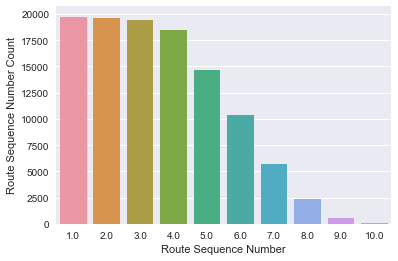

In [33]:


ax  = sns.countplot(OnTime['route_sequence_number'])
ax = plt.ylabel('Route Sequence Number Count')
ax = plt.xlabel('Route Sequence Number')

The countplots look good with the removal of the cancelled flights.  Previously, we had some route sequence numbers >10.  This is not possible, because the most legs a line can contain in this dataset is 10

In [34]:
#Create indicator for ontime performance, where 1 = OnTime and 0 = LATE
OnTime['OnTimeIndicator'] = np.where(OnTime['dot_delay_mins']>=15, 0, 1)

#Need to fix the time of day first
OnTime['local_scheduled_dep_time']=OnTime['local_scheduled_dep_time'].apply(locale.atoi)

#Fix weight fields to be numeric
OnTime['bag_weight_total']=OnTime['bag_weight_total'].apply(locale.atoi)
OnTime['freight_weight_total']=OnTime['freight_weight_total'].apply(locale.atoi)
OnTime['aircraft_landing_weight']=OnTime['aircraft_landing_weight'].apply(locale.atoi)
OnTime['aircraft_tow_weight']=OnTime['aircraft_tow_weight'].apply(locale.atoi)
OnTime['miles_flown']=OnTime['miles_flown'].apply(locale.atoi)


In [35]:
#Need some Time of Day buckets
OnTime['TimeBucket']=pd.cut(OnTime['local_scheduled_dep_time'],[0, 600, 1000, 1500, 2000, 2400],5, 
       labels=["PreDawn", "AMRush", "MidDay", "PMRush", "LateNight"])

#Need an "International" code
OnTime['International'] = np.where(OnTime['origin_country']!=OnTime['destination_country'], 1, 0)

In [36]:
print(OnTime['origin_country'], OnTime['destination_country'], OnTime['International'])

0         United States of America
1         United States of America
2         United States of America
3         United States of America
4         United States of America
5         United States of America
6         United States of America
7         United States of America
8         United States of America
9         United States of America
10        United States of America
11        United States of America
12        United States of America
13        United States of America
14        United States of America
15        United States of America
16        United States of America
17        United States of America
18        United States of America
19        United States of America
20        United States of America
21        United States of America
22        United States of America
23        United States of America
24        United States of America
25        United States of America
26        United States of America
27        United States of America
28        United Sta

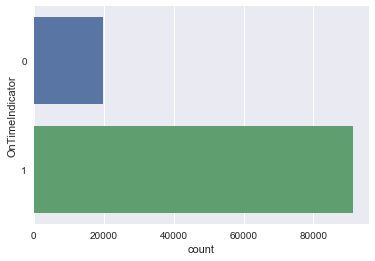

In [37]:
#show classes, we need to ensure there isn't a major class imbalance
ax = sns.countplot(y =  OnTime['OnTimeIndicator'])

This is actually probably a big enough class imbalance that we need to address it and possibly boost for late flights.

In [38]:
OnTime.columns.values

array(['origin', 'origin_latitude', 'origin_longitude', 'destination',
       'destination_latitude', 'destination_longitude', 'origin_country',
       'destination_country', 'flight_number', 'miles_flown',
       'departure_date', 'day_of_week', 'flight_type_code',
       'flight_route_number', 'route_sequence_number', 'aircraft_type_cde',
       'flight_cancellation_code', 'alternate_airport', 'push_delay_mins',
       'delay_type', 'delay_id', 'aircraft_seat_count',
       'aircraft_tow_weight', 'aircraft_landing_weight', 'fuel_loaded',
       'central_scheduled_dep_time', 'local_scheduled_dep_time',
       'central_scheduled_arr_time', 'local_schedulced_arr_time',
       'total_passengers', 'local_passengers', 'connecting_passengers',
       'thru_passengers', 'unaccompanied_minors',
       'total_nonrev_passengers', 'dot_security_delay_time',
       'NAS_delay_minutes', 'weather_delay_minutes', 'dot_delay_mins',
       'flt_attendant_change_ind', 'total_bags', 'bag_weight_total',


In [39]:
#One Hot Encode any categorical variables
#Definitely origin and destination variables
#Aircraft Code

cols_to_encode = ['origin', 'destination', 'aircraft_type_cde', 'day_of_week', 'TimeBucket', 
                  'flight_type_code', 'flt_attendant_change_ind', 'International', 'delay_type', 'delay_id']
OnTime = pd.get_dummies(OnTime,columns = cols_to_encode)

In [51]:
OnTime.describe()

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,miles_flown,flight_route_number,route_sequence_number,push_delay_mins,aircraft_seat_count,aircraft_tow_weight,...,delay_id_15,delay_id_16,delay_id_2,delay_id_3,delay_id_4,delay_id_5,delay_id_6,delay_id_7,delay_id_8,delay_id_9
count,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,...,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000,111055.000000
mean,36.000711,-97.204804,36.003330,-97.208694,760.316618,312.861069,3.527720,3.829841,146.832687,129827.855009,...,0.000135,0.000468,0.033380,0.046499,0.034325,0.005214,0.024204,0.006231,0.000495,0.001306
std,5.055974,16.076966,5.059994,16.090650,464.998176,181.796940,1.931696,13.977466,11.447985,12730.636376,...,0.011621,0.021634,0.179627,0.210565,0.182064,0.072017,0.153683,0.078692,0.022249,0.036110
min,9.992500,-122.595000,9.992500,-122.595000,137.000000,1.000000,1.000000,0.000000,122.000000,85948.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.846940,-115.158890,32.846940,-115.158890,377.000000,158.000000,2.000000,0.000000,143.000000,121745.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.079720,-95.278610,36.079720,-95.278610,650.000000,316.000000,3.000000,0.000000,143.000000,129663.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,39.858330,-83.344440,39.858330,-83.344440,997.000000,464.000000,5.000000,2.000000,143.000000,136456.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,47.620000,-66.002220,47.620000,-66.002220,2627.000000,647.000000,10.000000,779.000000,175.000000,174254.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
#Define our X and Y Sets

#Y set: 
Y=np.array(OnTime['OnTimeIndicator'])



columnstotake=np.r_[1, 2, 3, 4, 8, 14, 15, 16, 17, 18, 25:30, 31:40, 41:285]
#columnstotake=np.r_[1, 2, 3, 4, 8, 14, 15, 16, 17, 18, 25:30]

columnstotake = columnstotake - 1

#X Set:
#X=OnTime.ix[:, [-'OnTimeIndicator']]
X=OnTime.ix[:,columnstotake]
X.columns.values

array(['origin_latitude', 'origin_longitude', 'destination_latitude',
       'destination_longitude', 'miles_flown', 'push_delay_mins',
       'aircraft_seat_count', 'aircraft_tow_weight',
       'aircraft_landing_weight', 'fuel_loaded', 'connecting_passengers',
       'thru_passengers', 'unaccompanied_minors',
       'total_nonrev_passengers', 'dot_security_delay_time',
       'weather_delay_minutes', 'dot_delay_mins', 'total_bags',
       'bag_weight_total', 'freight_weight_total',
       'scheduled_turn_minutes', 'itins_in', 'itins_out', 'itins_on_leg',
       'origin_ABQ', 'origin_ALB', 'origin_AMA', 'origin_ATL',
       'origin_AUA', 'origin_AUS', 'origin_BDL', 'origin_BHM',
       'origin_BNA', 'origin_BOI', 'origin_BOS', 'origin_BUF',
       'origin_BUR', 'origin_BWI', 'origin_BZE', 'origin_CAK',
       'origin_CHS', 'origin_CLE', 'origin_CLT', 'origin_CMH',
       'origin_CRP', 'origin_CUN', 'origin_DAL', 'origin_DAY',
       'origin_DCA', 'origin_DEN', 'origin_DSM', 'origin_DT

In [156]:
%%time

#Basic Logistic Regression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ShuffleSplit

yhat = np.zeros(Y.shape) # we will fill this with predictions

scl = StandardScaler()
XScl = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = GaussianNB()

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(XScl,Y):
    #print("X NAN", np.any(np.isnan(XScl[train])))
    #print("X Finite", np.any(np.isfinite(XScl[train])))
    #print("Y NAN", np.any(np.isnan(Y[train])))
    #print("Y Finite", np.any(np.isfinite(Y[train])))
    clf.fit(XScl[train],Y[train])
    yhat[test] = clf.predict(XScl[test])
 
    
total_accuracy = mt.accuracy_score(Y, yhat)
print ('Logistic Regression', total_accuracy)

Logistic Regression 0.728242762595
CPU times: user 14.2 s, sys: 7.48 s, total: 21.7 s
Wall time: 24.7 s


In [158]:
%%time

#Basic Logistic Regression with PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ShuffleSplit

yhat = np.zeros(Y.shape) # we will fill this with predictions

scl = StandardScaler()
XScl = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)


# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [('PCA',PCA(n_components=150,svd_solver='randomized')),
     ('CLF',GaussianNB())]
)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(XScl,Y):
    #print("X NAN", np.any(np.isnan(XScl[train])))
    #print("X Finite", np.any(np.isfinite(XScl[train])))
    #print("Y NAN", np.any(np.isnan(Y[train])))
    #print("Y Finite", np.any(np.isfinite(Y[train])))
    clf_pipe.fit(XScl[train],Y[train])
    yhat[test] = clf_pipe.predict(XScl[test])
 
    
total_accuracy = mt.accuracy_score(Y, yhat)
print ('Logistic Regression with PCA', total_accuracy)

Logistic Regression 0.822925577417
CPU times: user 4min 28s, sys: 22.6 s, total: 4min 51s
Wall time: 3min 42s


In [160]:
%%time

#Random Forest with PCA
from sklearn.ensemble import RandomForestClassifier

yhat = np.zeros(Y.shape) # we will fill this with predictions

scl = StandardScaler()
XScl = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)


# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [('PCA',PCA(n_components=150,svd_solver='randomized')),
     ('CLF',RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1))]
)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(XScl,Y):
    #print("X NAN", np.any(np.isnan(XScl[train])))
    #print("X Finite", np.any(np.isfinite(XScl[train])))
    #print("Y NAN", np.any(np.isnan(Y[train])))
    #print("Y Finite", np.any(np.isfinite(Y[train])))
    clf_pipe.fit(XScl[train],Y[train])
    yhat[test] = clf_pipe.predict(XScl[test])
 
    
total_accuracy = mt.accuracy_score(Y, yhat)
print ('Random Forest Classifier', total_accuracy)



Logistic Regression 0.870712709919
CPU times: user 1h 25min 44s, sys: 41.7 s, total: 1h 26min 25s
Wall time: 45min 43s


In [153]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt


yhat = np.zeros(Y.shape) # we will fill this with predictions

scl = StandardScaler()
XScl = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=5)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(XScl,Y):
    clf.fit(XScl[train],Y[train])
    yhat[test] = clf.predict(XScl[test])
 
    
total_accuracy = mt.accuracy_score(Y, yhat)
print ('KNN', total_accuracy)

NameError: name 'Stratified' is not defined

In [119]:
yhat

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
# logistic regression?



In [ ]:
# KD tree?

In [ ]:
# Decision Tree?

In [ ]:
#Naive Bayes

In [ ]:
#KNN

#%%time

# setup pipeline to take PCA, then fit a KNN classifier
clf_pipe = Pipeline(
    [('PCA_Eric',PCA(n_components=200)),
     ('CLF_Eric',KNeighborsClassifier(n_neighbors=1))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,Y):
    clf_pipe.fit(X[train],Y[train])
    yhat[test] = clf_pipe.predict(X[test])

total_accuracy = mt.accuracy_score(Y, yhat)
print ('KNN, pipeline accuracy', total_accuracy)

In [ ]:
#Random Forest